# 다항 회귀와 과대적합/과소적합 이해

## 다항 회귀 이해
회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항(Polynomial) 회귀라고 한다. 한가지 주의할 점은 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀이다.
다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀이다. 회귀에서 선형 회귀와 비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따르는 것이고 독립 변수가 선형/비선형 여부와는 상관없다.

아쉽게도 사이킷런에서는 다항 회귀를 위한 클래스를 명시적으로 제공하지는 않는다. 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. 이를 위해 사이킷럿은 PolynomialFeatures 클래스를 통해 피처를 Polynomial 피처로 변화한다. PolynomialFeature 클래스는 degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 transform() 메서드를 통해 이 같은 변환 작업을 수행한다.

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항 계수를 이용해 3차 다항 회귀 함수식을 유도해보자  
3차 다항식의 결정 함수식 polynomial_func을 만들고  
일차 단항식 계수를 삼차 다항식 계수로 변환하고 이를 선형 회귀에 적용한다.

In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]
3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


사이킷런은 PolynomialFeature로 feature를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현한다.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 feature의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 feature 간의 관계까지 모델링이 가능하다. 하지만 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다. 즉, 차수가 높아질수록 과적합의 문제가 크게 발생한다.  

예제, 원래 dataset은 feature X와 target y noise가 포함된 다항식의 cosine 그래프 관계를 가지도록 만들어준다. 이에 기반하여 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제이다.

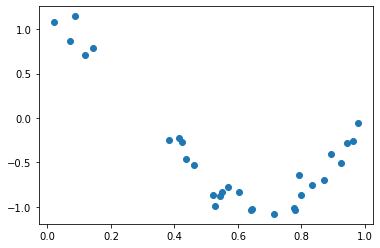

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X, y)
plt.show()

그 다음 예측 결과를 비교할 다항식 차수를 1, 4, 15 변경하면서 결과를 비교해보겠다. 다항식 차수별로 수행한 후 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가할 것이다. 그리고 0~1 사이의 균일한 100개의 테스트 dataset을 이용해 차수별 화귀 예측 곡선을 그려본다.


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415800e+06  2.03715960e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE 는 182493841.87 입니다.


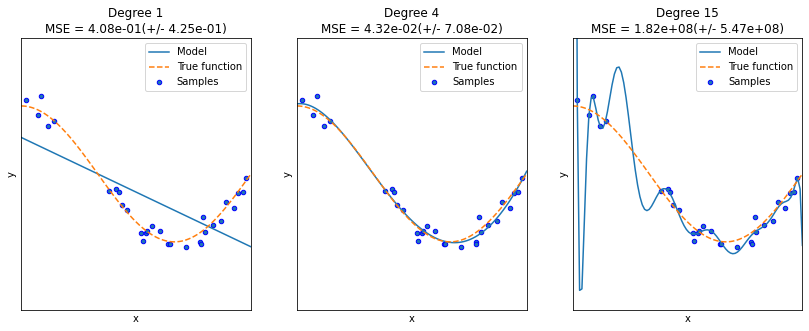

In [5]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다. >
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()

실선은 다항 회귀 예측 곡선이고, 점선으로 표현된 곡선은 실제 dataset X, Y의 코사인 곡선이다.

왼쪽의 Degree1은 단순 선형 회귀와 같다. 실제 dataset인 cosine을 예측하기에는 단순하고, 예측 곡선이 학습 데이터의 패턴을 반형하지 못하고 있다.

가운데 Degree4 예측 곡선은 실제 dataset과 유사하고, noise를 예측하진 않지만 학습 dataset을 비교적 잘 반영하고 테스트 데이터까지 잘 예측하는 모델이 되었다.

오른쪽은 Degree 15예측 곡선은 MSE 값이 어처구니 없는 값으로 나왔다. 예측 곡선을 보면 dataset의 noise까지 지나치게 잘 반영해 학습 dataset은 정확하게 예측했지만, 테스틑 dataset은 실제 곡선과는 완전히 다른 형태의 예측 곡선으로 만들어졌다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었다.

## 편향 - 분산 트레이드 오프(Bias - Variance Trade off)

머신 러닝이 극복해야하는 가장 중요한 이슈 중 하나로, 위 예제의 Degreee 1과 같은 모델은 매우 단순한 모델로 지나치게 한 방향으로 치우친 경향이 있는 모델이다. 이런 모델을 고편향(High Bias)성을 가졌다고 한다.
반대로 Degreee 15와 같은 모델은 학습 데이터 하나하나의 특성을 매우 잘 반영하면서 지나치게 복잡한 모델이 되었고 높은 변동성을 가지게 되었다. 이런 모델은 고분산(High Variance)성을 가졌다고 한다.

* Low Bias/Low Variance는 예측 결과가 실제 결과에 비해 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부위에 집중돼 있는 아주 뛰어난 성능을 보여준다.
* Low Bias/High Variance는 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓게 분포되고 있다.
* High Bias/Low Variance는 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중되어 있다.
* High Bias/High Variance는 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포되어 있다.

bias와 variance는 한쪽이 높으면 다른 한 쪽이 낮아지는 경향이 있다. bias가 너무 높으면 전체 error가 높고 bias를 점점 낮추면 동시에 variance는 높아지면서 전체 error는 낮아진다. 전체 error가 가장 낮아지는 Goldilocks 지점을 통과하면서 분산은 지속적으로 높아지고 error도 증가하면서 예측 성능이 다시 낮아진다.
high_bias/ low_variance는 과소적합되기 쉬우며 low bias/high variance는 과적합되기 쉽다.
bias와 variance가 서로 trade off이루면서 가장 낮은 cost를 가지는 모델을 구축하는 것이 가장 효율적인 머신러닝 모델이다.